<h1>内存优化</h1>

数据量相当大的时候，后续进行特征工程会导致更多的内存损耗，因此进行内存优化是有必要的，先提供以下函数负责减少数据占用存储空间大小

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('data/X_train_party1.csv')

<h3>1. 内存统计</h3>

可以利用pandas.memory_usage()查看每列占用的字节数

In [16]:
data.memory_usage()

Index                     128
id                    5120000
loanAmnt              5120000
term                  5120000
interestRate          5120000
installment           5120000
grade                 5120000
subGrade              5120000
employmentTitle       5120000
employmentLength      5120000
homeOwnership         5120000
annualIncome          5120000
verificationStatus    5120000
issueDate             5120000
purpose               5120000
postCode              5120000
regionCode            5120000
dti                   5120000
delinquency_2years    5120000
ficoRangeLow          5120000
ficoRangeHigh         5120000
openAcc               5120000
pubRec                5120000
pubRecBankruptcies    5120000
dtype: int64

In [17]:
memory = data.memory_usage().sum()

In [18]:
memory

117760128

利用info()方法，最下方也可以看到占用的内存大小

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640000 entries, 0 to 639999
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  640000 non-null  int64  
 1   loanAmnt            640000 non-null  float64
 2   term                640000 non-null  int64  
 3   interestRate        640000 non-null  float64
 4   installment         640000 non-null  float64
 5   grade               640000 non-null  object 
 6   subGrade            640000 non-null  object 
 7   employmentTitle     639999 non-null  float64
 8   employmentLength    602458 non-null  object 
 9   homeOwnership       640000 non-null  int64  
 10  annualIncome        640000 non-null  float64
 11  verificationStatus  640000 non-null  int64  
 12  issueDate           640000 non-null  object 
 13  purpose             640000 non-null  int64  
 14  postCode            639999 non-null  float64
 15  regionCode          640000 non-nul

In [20]:
print('内存占用{:.2f} MB'.format(memory / 1024 / 1024))

内存占用112.30 MB


可以看到，两种方法统计的情况差不多哈～

<h3>2. 数据类型介绍</h3>

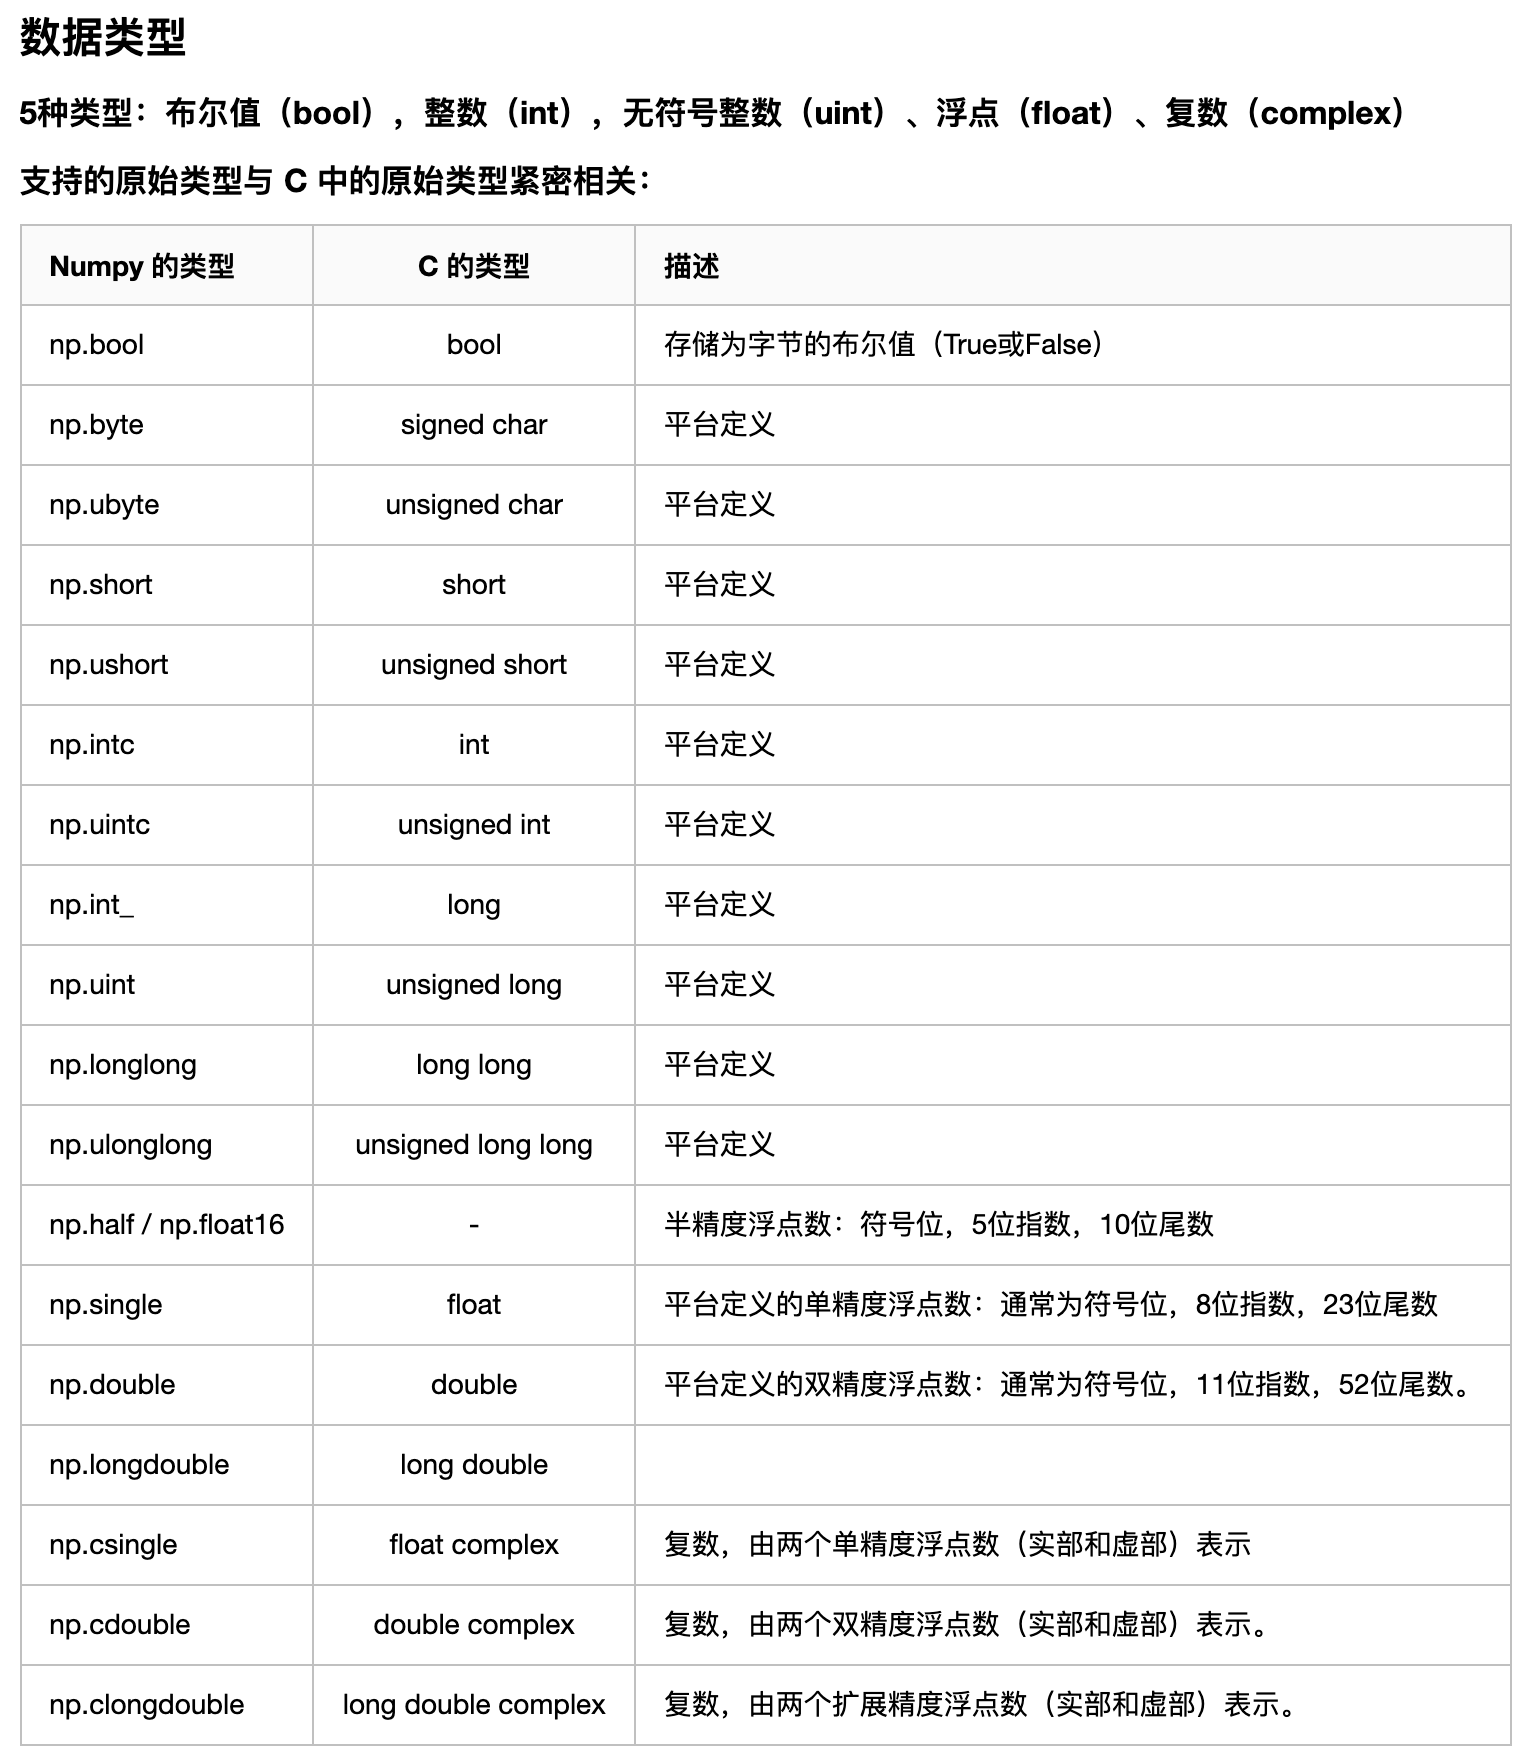

提供了一组固定大小的别名：<br>
<b>类型代码一般是类型表示字母+位数</b>，如int8

numpy.iinfo(dtype)函数显示整数类型的机器限制。<br>
dtype:[整数类型，dtype或实例]要获取其有关信息的整数数据类型的种类

In [21]:
import numpy as np

In [22]:
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [23]:
def reduce_mem_usage(df):
    """ 
        遍历Dataframe的所有列并修改数据类型以减少内存使用。
        iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    # 开始时占用的内存量
    start_mem = df.memory_usage().sum()
    print('内存占用{:.2f} B'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            """
            如果每一列的数据类型是数值型，哈哈，object类型也没法修改呀～
            """
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                """
                
                """
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum()
    print('优化后内存为: {:.2f} MB'.format(end_mem))
    print('内存使用减少 {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [24]:
data2 = reduce_mem_usage(data)

内存占用117760128.00 B
优化后内存为: 45440128.00 MB
内存使用减少 61.4%
